In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,explained_variance_score,confusion_matrix,accuracy_score,classification_report,log_loss
import seaborn as sns

In [2]:
data_hungary = pd.read_excel('Hungary.xlsx')
data_hungary.shape
data_hungary.head()
data_hungary.isnull().sum()
#data_hungary[data_hungary['Cholesterol']==0]

Location          0
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
#Investigating all features within a column

for columns in data_hungary:
    unique_values = np.unique(data_hungary[columns])
    count_values = len(unique_values)
    if count_values < 10:
        print('The number of values for feature {} is:{} -- {}'.format(columns,count_values,unique_values))
    else:
        print('The number of values for feature {} is:{}'.format(columns,count_values))

The number of values for feature Location is:1 -- ['Hungarian']
The number of values for feature Age is:42
The number of values for feature Sex is:2 -- ['F' 'M']
The number of values for feature ChestPainType is:4 -- ['ASY' 'ATA' 'NAP' 'TA']
The number of values for feature RestingBP is:40
The number of values for feature Cholesterol is:138
The number of values for feature FastingBS is:2 -- [0 1]
The number of values for feature RestingECG is:3 -- ['LVH' 'Normal' 'ST']
The number of values for feature MaxHR is:78
The number of values for feature ExerciseAngina is:2 -- ['N' 'Y']
The number of values for feature Oldpeak is:32
The number of values for feature ST_Slope is:3 -- ['Down' 'Flat' 'Up']
The number of values for feature HeartDisease is:2 -- [0 1]


In [4]:
data_hungary.columns

Index(['Location', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

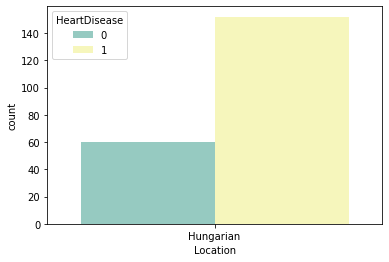

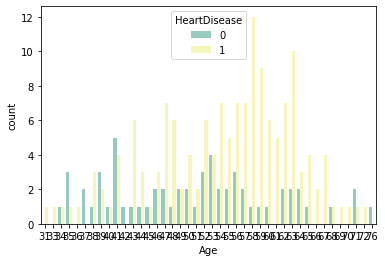

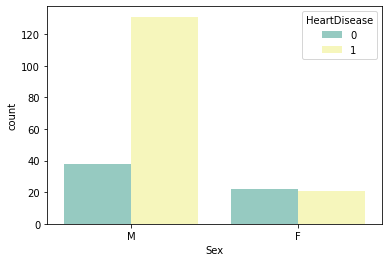

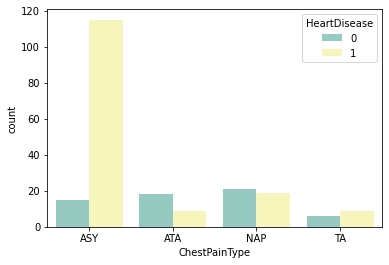

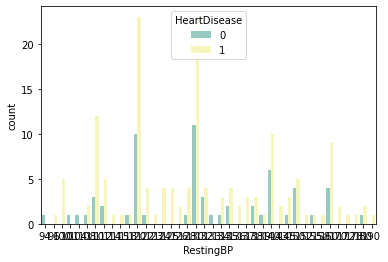

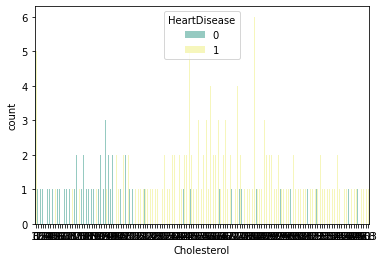

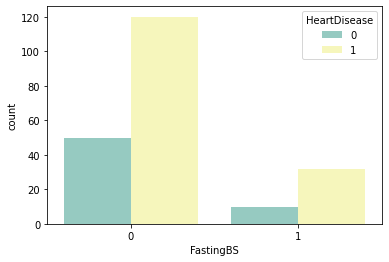

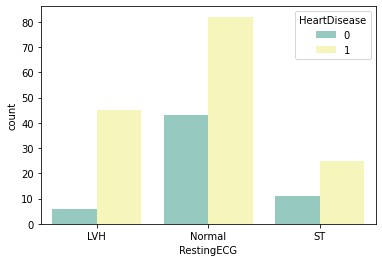

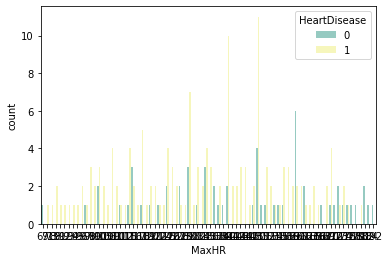

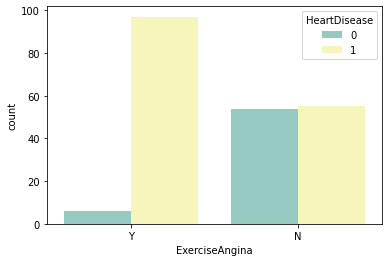

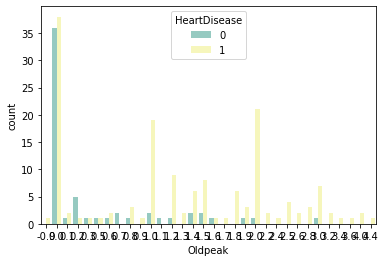

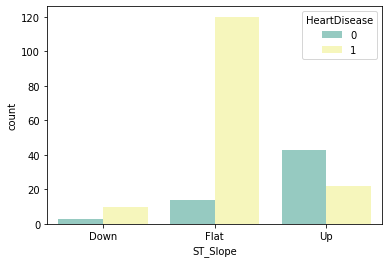

In [5]:
#Evaluating each feature and observing the affect on Y
feature = ['Location', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope']

for f in feature:
    sns.countplot(x = f,data = data_hungary,palette='Set3',hue = 'HeartDisease')
    plt.show()

In [6]:
#Feature Selection
# Converting all variables 
hungary_data = pd.get_dummies(data_hungary,columns = ["ChestPainType", "Sex","RestingECG","ExerciseAngina","ST_Slope"],prefix=["ChestPainType", "Sex","RestingECG","ExerciseAngina","ST_Slope"])
hungary_data.shape


(212, 22)

#As the ration of heartdisease is very different, we need to balance the dataset to avoid any bias in our model. We have used an oversampling technique to deal with the issue without loosing any data

In [7]:
X = hungary_data.drop(['HeartDisease','Location'],axis=1).values     # Predictor feature columns 
Y = hungary_data['HeartDisease'].values   # Predicted class (1=True, 0=False) 

/Users/saim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

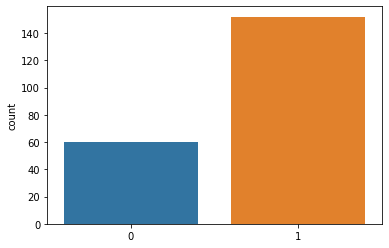

In [8]:
no_hd=data_hungary[data_hungary['HeartDisease']==0]
yes_hd=data_hungary[data_hungary['HeartDisease']== 1]
data_hungary['HeartDisease'].value_counts()

sns.countplot(Y)

In [9]:
# #Handeling imbalances in dataset
from imblearn.combine import SMOTETomek
#Implementing oversampling for handeling imbalance
smk = SMOTETomek(random_state = 42)
X_res,y_res = smk.fit_resample(X,Y)

/Users/saim/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Original Dataset Shape Counter({1: 152, 0: 60})
Resampled Dataset Shape Counter({1: 143, 0: 143})


<AxesSubplot:ylabel='count'>

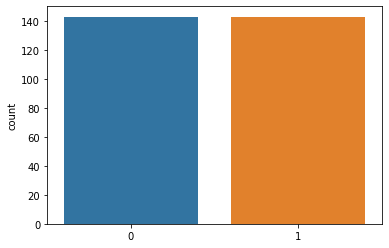

In [10]:
from collections import Counter
print('Original Dataset Shape {}'.format(Counter(Y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))
sns.countplot(y_res)

Since Cholestrol Level Cannot be 0 we are replacing 0 with mean of the column 'Cholestrol'

In [11]:
# Handeling the cholestrol column 
hungary_data['Cholesterol'].replace(0,hungary_data['Cholesterol'].mean(),inplace=True)

# LOGISTIC REGRESSION

In [12]:
############# Applying Logistic Regression ##################
#X_logreg = Cleve_data[columns_to_keep].values
#y_logreg = Cleve_data['HeartDisease']

In [13]:
X_logreg = hungary_data.drop(['HeartDisease','Location'],axis=1)    # Predictor feature columns 
Y_logreg = hungary_data['HeartDisease']

In [14]:
#Resampling for Logistic Regression
X_new,y_new = smk.fit_resample(X_logreg,Y_logreg)


In [15]:
columns = X_new.columns

In [16]:
## Import CV and cheking model accuracy
#from sklearn.model_selection import cross_val_score
#logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
#print(cross_val_score(logreg,X_log,y_log,cv=10,scoring='accuracy').mean())

In [17]:
##### Splitting Data for Train , Test and Validate 

X_train, X_test, y_train, y_test  = train_test_split(X_new,y_new, train_size=0.7,test_size = 0.3, random_state = 55,stratify = y_new )



In [18]:
print(X_train.shape)
print(X_test.shape)


print(y_train.shape)
print(y_test.shape)



(201, 20)
(87, 20)
(201,)
(87,)


In [19]:
#Running Log model
model = LogisticRegression(solver='liblinear', max_iter=1000)
log_results=model.fit(X_train, y_train)

#Train Accuracy
print('Training accuracy is {}'.format(model.score(X_train,y_train)))
#predict on training set
y_pred_train = model.predict(X_train)
#Predictions using test set
y_pred = model.predict(X_test)

Training accuracy is 0.945273631840796


Model Evaluation

In [20]:
#Accuracy Score Training Set
print('Training Set accuracy is {}'.format(model.score(X_train,y_train)))
# Accuracy of test set
print('Test Set accuracy is {}'.format(model.score(X_test,y_test)))

#Classification Report
print(classification_report(y_test,y_pred))

y_pred

Training Set accuracy is 0.945273631840796
Test Set accuracy is 0.896551724137931
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.89      0.91      0.90        44

    accuracy                           0.90        87
   macro avg       0.90      0.90      0.90        87
weighted avg       0.90      0.90      0.90        87



array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [21]:
model.coef_[0]

array([ 0.02043392, -0.0443953 ,  0.01635677, -0.71317936, -0.00691148,
        0.2631037 ,  1.36859354, -0.03924917, -0.3010355 ,  0.2924397 ,
        0.59273425,  1.19919366,  1.71545393, -0.23748776, -0.48120162,
       -1.10769662,  1.21451038, -0.4322579 ,  1.87095183, -0.19391053])

In [22]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

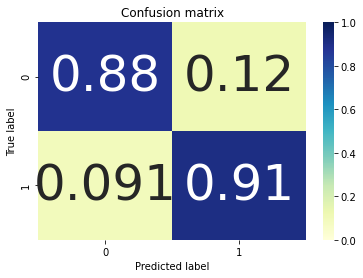

In [23]:
lr_cm = confusion_matrix(y_test,y_pred)
lrcm_norm = lr_cm/lr_cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(lrcm_norm,model.classes_)

In [24]:
# def get_feature_importance(model,feature_names):
#     feature_importance = (
#     pd.DataFrame({
#             'variable':columns,
#             'coefficient':model.coef_[0]
#                 }
#                 )
#     .round(decimals=4)\
#     .sort_values('coefficient',ascending = False).reset_index(drop = True)\
#     .style.bar(color=['red','green'],align='zero')\
#     )
#     return feature_importance
# get_feature_importance(model,columns)

In [25]:
my_dict = dict(zip(columns,model.coef_[0]))

In [26]:
all_features = pd.DataFrame({'variable':columns,'coefficient':model.coef_[0]}).round(decimals=4)\
.sort_values('coefficient',ascending = False).reset_index(drop=True)
#.set_index('variable')\

#

In [27]:
confusion_matrix(y_test,y_pred)


array([[38,  5],
       [ 4, 40]])

In [28]:
all_features.style.bar(color=['red','green'],align='zero')

,variable,coefficient
0,ST_Slope_Flat,1.871000
1,RestingECG_LVH,1.715500
2,ChestPainType_ASY,1.368600
3,ExerciseAngina_Y,1.214500
4,Sex_M,1.199200
5,Sex_F,0.592700
6,ChestPainType_TA,0.292400
7,Oldpeak,0.263100
8,Age,0.020400
9,Cholesterol,0.016400


In [29]:
selected_features = all_features.drop([8,9,10,11,12])

In [30]:
selected_features = selected_features.reset_index(drop=True)

In [31]:
filtered= []
for i in selected_features['variable']:
    filtered.append(i)

In [32]:
filtered

['ST_Slope_Flat',
 'RestingECG_LVH',
 'ChestPainType_ASY',
 'ExerciseAngina_Y',
 'Sex_M',
 'Sex_F',
 'ChestPainType_TA',
 'Oldpeak',
 'ST_Slope_Up',
 'RestingECG_Normal',
 'ChestPainType_NAP',
 'ST_Slope_Down',
 'RestingECG_ST',
 'FastingBS',
 'ExerciseAngina_N']

In [33]:
#LOG REG WITH SELECTED FEATURES
X_lg_1 = hungary_data[filtered]
X_new_1,y_new_1 = smk.fit_resample(X_lg_1,Y_logreg)
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_new_1,y_new_1, train_size=0.7,test_size = 0.3, random_state = 55,stratify = y_new_1)
model.fit(X_train_1,y_train_1)
y_pred_1 = model.predict(X_test_1)


In [34]:
#Accuracy Score Training Set
print('Training Set accuracy is {}'.format(model.score(X_train_1,y_train_1)))
# Accuracy of test set
print('Test Set accuracy is {}'.format(model.score(X_test_1,y_test_1)))

#Classification Report
print(classification_report(y_test_1,y_pred_1))

y_pred
predict_proba_1 = model.predict_proba(X_test_1)

Training Set accuracy is 0.8857142857142857
Test Set accuracy is 0.8777777777777778
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.89      0.87      0.88        45

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



In [35]:
new_scores = pd.DataFrame({'variable':filtered,'coefs':model.coef_[0]}).round(decimals=4)\
.sort_values('coefs',ascending = False).reset_index(drop=True)\
.style.bar(color=['red','green'],align='zero')

new_scores 

,variable,coefs
0,ST_Slope_Flat,1.676900
1,RestingECG_LVH,1.366600
2,ChestPainType_ASY,1.255900
3,ExerciseAngina_Y,0.965900
4,ChestPainType_TA,0.758800
5,Sex_M,0.726800
6,Oldpeak,0.360700
7,FastingBS,0.191500
8,RestingECG_ST,-0.042500
9,ExerciseAngina_N,-0.225700


EVALUATION METRIC 2 - CONFUSION MATRIX

In [36]:
#Visualizing CM
cm = confusion_matrix(y_test_1,y_pred_1)
# interms of percentage
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
cm_norm

array([[0.88888889, 0.11111111],
       [0.13333333, 0.86666667]])

In [37]:
y_pred.shape

(87,)

In [38]:
cm

array([[40,  5],
       [ 6, 39]])

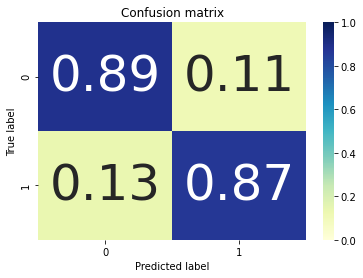

In [39]:
plot_confusion_matrix(cm_norm,model.classes_)

# CLASSIFICATION TREES

In [40]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,None],
    'min_samples_split':[0.1,0.2,0.3],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2',None],
    'splitter':['best','random']
    
}

In [41]:
#Choosing best params using GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=params,cv=5,n_jobs=-1)

In [42]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [0.1, 0.2, 0.3],
                         'splitter': ['best', 'random']})

In [43]:
x = clf.best_estimator_

In [44]:
dt = x
dt.fit(X_train,y_train)
y_pred= dt.predict(X_test)


In [45]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=13, max_features='auto',
                       min_samples_leaf=3, min_samples_split=0.1,
                       splitter='random')
dt.fit(X_train,y_train)
y_pred= dt.predict(X_test)


In [46]:
dt.score(X_train,y_train)

0.8507462686567164

In [47]:
dt.score(X_test,y_test)

0.7126436781609196

In [48]:
fi_col =[]
fi = []
from sklearn import metrics

#Running Feature Importance 
for i,column in enumerate(hungary_data.drop(['HeartDisease','Location'],axis=1)):
    print('The Feature importance for {} is:{}'.format(column,dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
    

The Feature importance for Age is:0.0
The Feature importance for RestingBP is:3.635623072843176e-05
The Feature importance for Cholesterol is:0.0
The Feature importance for FastingBS is:0.0
The Feature importance for MaxHR is:0.0
The Feature importance for Oldpeak is:0.0013032040193493126
The Feature importance for ChestPainType_ASY is:0.775239664091664
The Feature importance for ChestPainType_ATA is:0.00039927906763158495
The Feature importance for ChestPainType_NAP is:0.0
The Feature importance for ChestPainType_TA is:0.0371697574963214
The Feature importance for Sex_F is:0.0007136593439293689
The Feature importance for Sex_M is:0.0
The Feature importance for RestingECG_LVH is:0.005780640685827924
The Feature importance for RestingECG_Normal is:0.0011894322398822482
The Feature importance for RestingECG_ST is:0.0
The Feature importance for ExerciseAngina_N is:0.08672250774544159
The Feature importance for ExerciseAngina_Y is:0.006592901990061334
The Feature importance for ST_Slope_Do

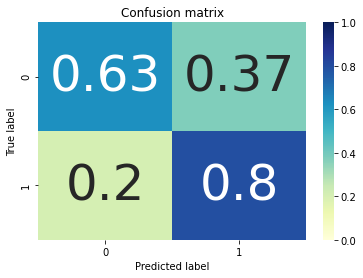

In [49]:
df_cm =confusion_matrix(y_test,y_pred)
df_cm
dfcm_percentage = df_cm/df_cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(dfcm_percentage,dt.classes_)

In [50]:
df_cm

array([[27, 16],
       [ 9, 35]])

In [51]:
fi_df=zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])
importance = fi_df.sort_values('Feature Importance',ascending = False).reset_index(drop = True)
importance


,Feature,Feature Importance
0,ChestPainType_ASY,0.775240
1,ExerciseAngina_N,0.086723
2,ST_Slope_Flat,0.044899
3,ST_Slope_Up,0.039953
4,ChestPainType_TA,0.037170
5,ExerciseAngina_Y,0.006593
6,RestingECG_LVH,0.005781
7,Oldpeak,0.001303
8,RestingECG_Normal,0.001189
9,Sex_F,0.000714


In [52]:
columns_to_keep = importance['Feature'][0:9]
hungary_data[columns_to_keep].shape

(212, 9)

In [53]:
dt_hungary = hungary_data[columns_to_keep]

In [54]:
print(dt_hungary.shape)
print(Y.shape)

(212, 9)
(212,)


In [55]:
dt_x,dt_y = smk.fit_resample(dt_hungary,Y)

In [56]:
x_train,x_test,Y_train,Y_test = train_test_split(dt_x,dt_y,test_size=0.3,stratify=dt_y)

In [57]:
clf_2 = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=params,cv=6,n_jobs=-1)

In [58]:
clf_2.fit(x_train,Y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [0.1, 0.2, 0.3],
                         'splitter': ['best', 'random']})

In [59]:
print(clf_2.best_estimator_)
x2 = clf_2.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=0.1,
                       random_state=0, splitter='random')


In [60]:

dt_2 = x2
dt_2.fit(x_train,Y_train)
dt_pred_2 = dt_2.predict(x_test)
dt_2.score(x_test,Y_test)

0.9222222222222223

[[43  2]
 [ 5 40]]


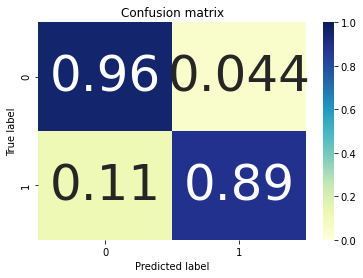

In [61]:
df_cm_2 =confusion_matrix(Y_test,dt_pred_2)
print(df_cm_2)
df2_norm = df_cm_2/df_cm_2.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(df2_norm,dt_2.classes_)

In [66]:
fi2_col = []
fi2 = []
#Running Feature Importance 
for i,column in enumerate(hungary_data[columns_to_keep]):
    print('The Feature importance for {} is:{}'.format(column,dt_2.feature_importances_[i]))
    
    fi2_col.append(column)
    fi2.append(dt.feature_importances_[i])
    

The Feature importance for ChestPainType_ASY is:0.12267611456281062
The Feature importance for ExerciseAngina_N is:0.05500722205939432
The Feature importance for ST_Slope_Flat is:0.10882345857910705
The Feature importance for ST_Slope_Up is:0.49831821595142806
The Feature importance for ChestPainType_TA is:0.02194382498097217
The Feature importance for ExerciseAngina_Y is:0.09835944633081987
The Feature importance for RestingECG_LVH is:0.006843051868129304
The Feature importance for Oldpeak is:0.030211860087634084
The Feature importance for RestingECG_Normal is:0.05781680557970442


In [67]:
fi_df_2 =zip(fi2_col,fi2)
fi_df_2 = pd.DataFrame(fi_df_2,columns=['Feature','Feature Importance'])
importance_2 = fi_df_2.sort_values('Feature Importance',ascending = False).reset_index(drop = True)
importance_2.style.bar(color=['red','green'],align='zero')


,Feature,Feature Importance
0,RestingECG_LVH,0.775240
1,ExerciseAngina_Y,0.001303
2,Oldpeak,0.000399
3,ExerciseAngina_N,0.000036
4,ChestPainType_ASY,0.000000
5,ST_Slope_Flat,0.000000
6,ST_Slope_Up,0.000000
7,ChestPainType_TA,0.000000
8,RestingECG_Normal,0.000000
